# 와인 종류 분류하기

sklearn의 예제 데이터 셋인 wine를 학습하는 모델을 만들어 보자.

## 필요한 모듈 Import하기

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

학습시킬 모델들도 import한다

In [2]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression

## 데이터 준비하기
sklearn에서 wine data set을 로드한다.

In [3]:
wine = load_wine()

## 데이터 이해하기

로드된 데이터를 분석해보자.  
우선 데이터 feature와 target을 확인해보자.

In [4]:
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

### 데이터 Describe 해 보기
우선 무슨 데이터 셋인지 설명부터 보자.

In [5]:
print(wine.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

구글 번역 결과

`이 데이터는 이탈리아의 같은 지역에서 3명의 다른 재배자가 재배한 와인을 화학적으로 분석한 결과입니다.
세 가지 유형의 와인에서 발견되는 서로 다른 성분에 대해 13가지 다른 측정값이 있습니다.`

결과적으로 해야 할은 13가지의 성분과 와인의 품질?(0~2)의 관계에 대해 알아보고 예측하는 것이다.

일단 실제로 13가지의 성분을 가지는지 확인해보자.

In [6]:
print(f"특성의 개수 : {len(wine.feature_names)}")
wine.feature_names

특성의 개수 : 13


['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

### Target Names 출력해 보기

다음으로 와인의 종류가 3가지 맞는지 확인해보자.

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

3가지가 맞긴한데, 이름이 그냥 class_0,1,2이다.  
더 이상의 정보는 없어서 잘 모르겠지만, 품질같다.

그냥 넘어가자.

### 데이터 구성 확인하기
마지막으로 데이터를 지정하기 전에  
pandas를 이용해서 데이터의 구성을 시각화해보자.

In [9]:
wine_df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [10]:
wine_df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

### 결측치 확인하기
결측치는 따로 없다.

In [11]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

### 이상치 확인하기
각 화학성분 별 분포를 시각화해서 이상치가 있는지 확인해보자.

In [12]:
wine_df['label'] = wine.target
wine_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


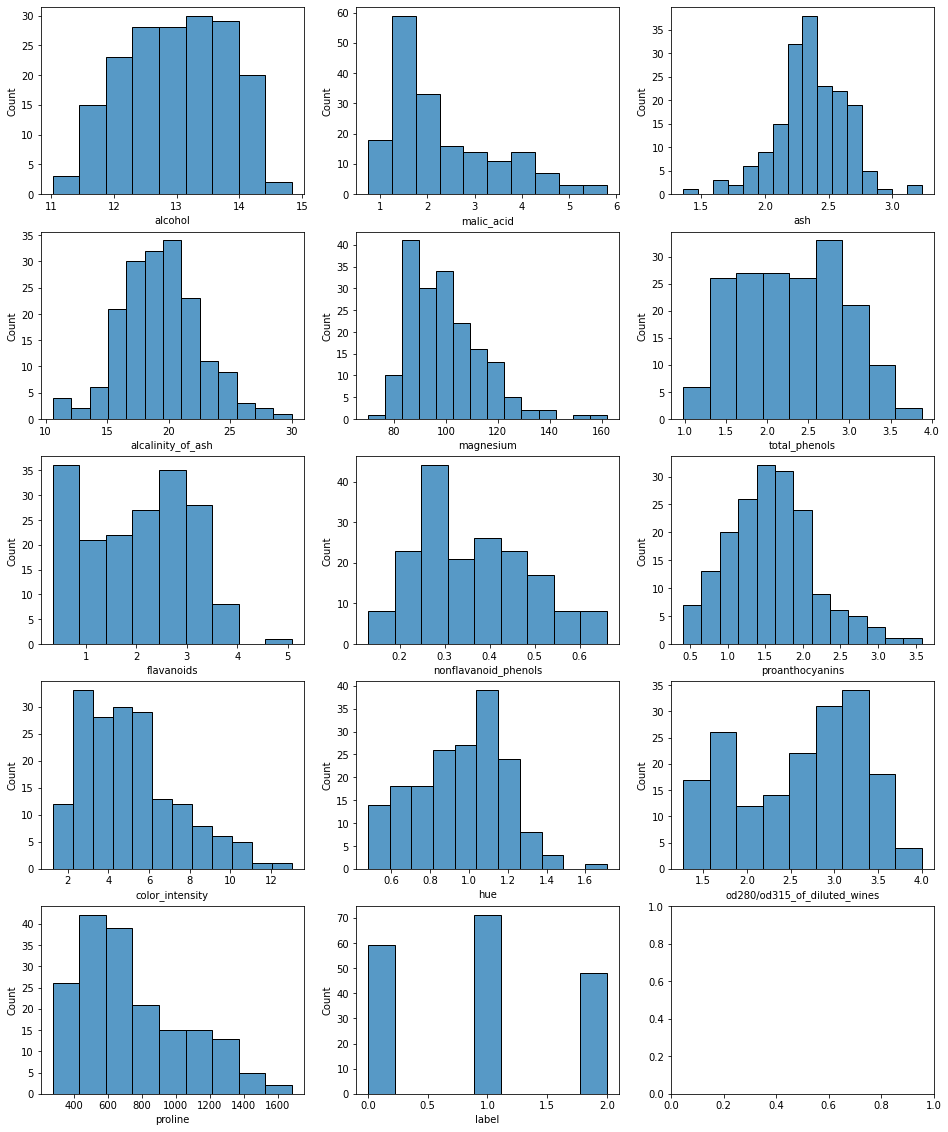

In [13]:
figure, axs_2d = plt.subplots(nrows=5, ncols=3)
figure.set_size_inches(16, 20)  # 그래프 크기를 조정

for x, ax in zip(wine_df.columns, np.ravel(axs_2d)):
    sns.histplot(data=wine_df, x=x, ax=ax)

flavanoids, hue등에서 살짝 떨어진 값이 있긴 하지만, 이상치라고 보긴 어렵다.

다음으로 정규화를 하기전에 각 feature과 label의 관계를 확인해보자.

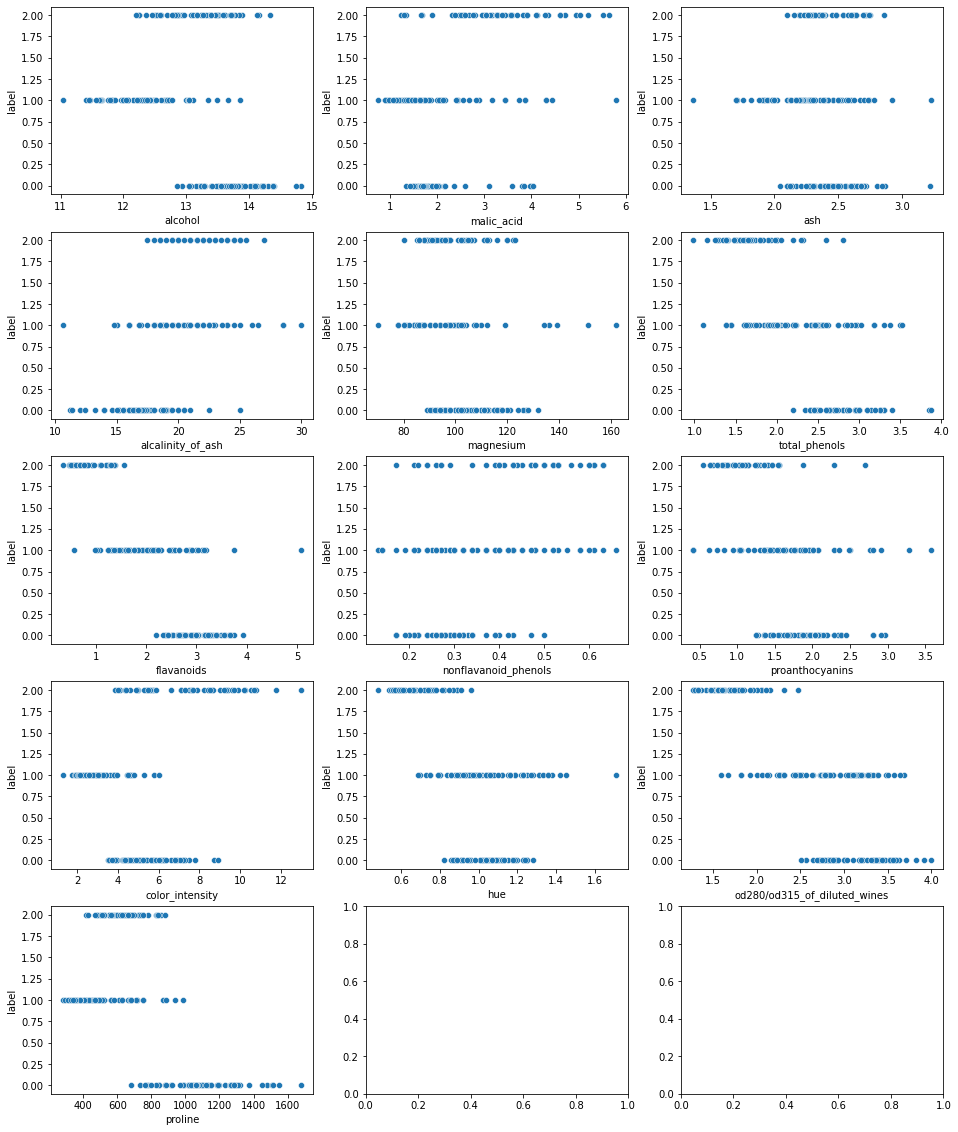

In [14]:
figure, axs_2d = plt.subplots(nrows=5, ncols=3)
figure.set_size_inches(16, 20)  # 그래프 크기를 조정

for x, ax in zip(wine_df.columns[:13], np.ravel(axs_2d)):
    sns.scatterplot(data=wine_df, y='label', x=x, ax=ax)

한 두개씩 튀는 데이터가 있지만, 대체저으로 품질에 따라 규칙성을 가지고 나뉘어진 것 같다.  
솔직히 데이터 분포가 뭔가 규칙은 있어 보이는데 어떻게 처리할지를 모르겠다.  

이번에는 간단하게 각 특성들을 데이터 순서대로 나열해서 라벨과 비교해보자.

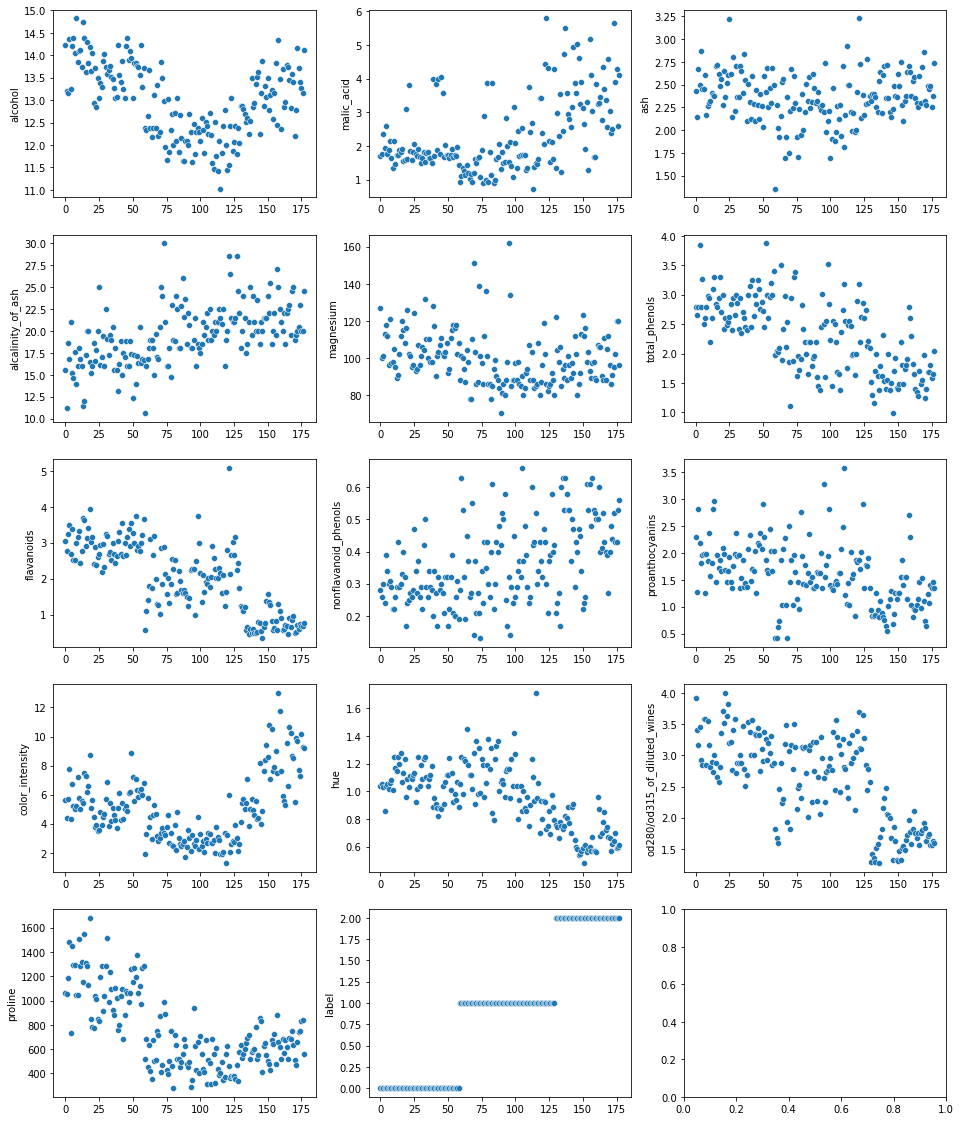

In [15]:
figure, axs_2d = plt.subplots(nrows=5, ncols=3)
figure.set_size_inches(16, 20)  # 그래프 크기를 조정

for x, ax in zip(wine_df.columns, np.ravel(axs_2d)):
    sns.scatterplot(data = wine_df[x], ax=ax)

예상대로 품질(라벨)은 0, 1, 2 순서대로 배치되어 있다.

그걸 토대로 다른 특성의 분포를 비교해보면 flavanoids와 Total Phenols가 라벨과의 상관관계가 있어보인다.  
두 특성 모두 계단 형식으로 감소하는 것을 확인할 수 있다.

또 color_intensityd와 alcohol이 라벨의 구간에 따라 나뉘어 지는 것이 보이지만,
두 개의 특성은 특이하게 class_1에서 가장 낮았다가 다시 오르는 모양을 보인다.


이제 데이터들을 정규화 시켜서 train, test데이터를 생성하자.

In [16]:
normalized_df = (wine_df - wine_df.mean())/wine_df.std()
normalized_df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000
mean,7.863872e-15,3.193450e-16,-4.067907e-15,-7.983626e-17,-1.995907e-17,3.991813e-17,9.181170e-16,-4.790176e-16,-1.676562e-15,-3.393041e-16,1.676562e-15,2.195497e-15,-7.983626e-17,0.000000
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-2.427388e+00,-1.428952e+00,-3.668813e+00,-2.663505e+00,-2.082381e+00,-2.101318e+00,-1.691200e+00,-1.862979e+00,-2.063214e+00,-1.629691e+00,-2.088840e+00,-1.889723e+00,-1.488987e+00,-1.210529
25%,-7.860275e-01,-6.568956e-01,-5.705131e-01,-6.871987e-01,-8.220960e-01,-8.829774e-01,-8.252115e-01,-7.380592e-01,-5.956034e-01,-7.928659e-01,-7.654033e-01,-9.495697e-01,-7.824306e-01,-1.210529
50%,6.082829e-02,-4.219218e-01,-2.375431e-02,1.514024e-03,-1.219377e-01,9.568993e-02,1.058511e-01,-1.755994e-01,-6.272092e-02,-1.587767e-01,3.303369e-02,2.370660e-01,-2.330629e-01,0.079735
75%,8.337767e-01,6.679088e-01,6.961448e-01,6.003946e-01,5.082048e-01,8.067217e-01,8.466967e-01,6.078267e-01,6.274055e-01,4.925666e-01,7.111583e-01,7.863692e-01,7.561165e-01,1.370000
max,2.253415e+00,3.100446e+00,3.147447e+00,3.145637e+00,4.359076e+00,2.532372e+00,3.054216e+00,2.395645e+00,3.475269e+00,3.425768e+00,3.292407e+00,1.955399e+00,2.963114e+00,1.370000


### Feature Data 지정하기
정규화된 13개의 feature 데이터를 지정한다.

In [17]:
x_data = normalized_df.drop('label', axis=1).values
x_data.shape

(178, 13)

### Label Data 지정하기
라벨은 기존의 target으로 지정한다.

In [18]:
y_data = wine.target # label
y_data.shape

(178,)

총 데이터의 개수와 라벨의 분포를 알아보자.

총 데이터 개수 : 178
class_0의 개수 : 59
class_1의 개수 : 71
class_2의 개수 : 48


<BarContainer object of 3 artists>

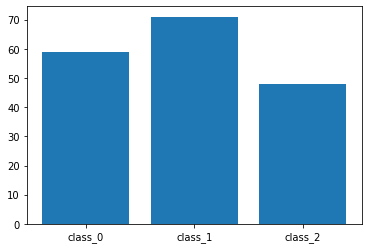

In [19]:
print(f"총 데이터 개수 : {len(x_data)}")

label_counts = []
for i, name in enumerate(wine.target_names):
    label_counts.append(np.count_nonzero(y_data == i))
    print(f"{name}의 개수 : {label_counts[i]}")
    
plt.bar(wine.target_names, label_counts)

총 데이터는 178개이고, class_1이 71개로 살짝 불균형한 데이터라고 할 수 있겠다.

## train, Test 데이터 분리

학습 데이터와 테스트 데이터로 분리한다.  
전체 데이터 자체가 적어서 어떻게 분리할지 고민해봤지만 결국 20%를 테스터 데이터로 분리하였다.

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_data, 
                                                    y_data, 
                                                    test_size=0.2, 
                                                    random_state=666)

In [21]:
x_train.shape

(142, 13)

In [22]:
x_test.shape

(36, 13)

## 다양한 모델로 학습시켜 보기

### Decision Tree 사용해 보기

In [23]:
model_decision_tree = DecisionTreeClassifier(random_state=1)
model_decision_tree.fit(x_train, y_train)
y_predict = model_decision_tree.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.95      0.97        20
           2       1.00      1.00      1.00         6

    accuracy                           0.97        36
   macro avg       0.97      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36



전체 정확도는 0.97

품질 '0'만 정밀도가 낮다.  
품질 '1'만 재현율이 낮다.

### Random Forest 사용해 보기

In [24]:
model_random_forest = RandomForestClassifier(random_state=2)
model_random_forest.fit(x_train, y_train)
y_predict = model_random_forest.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.95      0.97        20
           2       0.86      1.00      0.92         6

    accuracy                           0.97        36
   macro avg       0.95      0.98      0.97        36
weighted avg       0.98      0.97      0.97        36



전체 정확도 0.97

정확도는 의사결저트리와 같이 나왔지만, 정밀도 부분이 다르다.

나머지는 같지만 random forest는 품질 '2'의 정밀도만 매우낮다.

### SVM 사용해 보기

In [25]:
model_svm = svm.SVC(random_state=4)
model_svm.fit(x_train, y_train)
y_predict = model_svm.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



완벽하게 분류를 하였다.

처음 정규화를 하기 전에는 80%대의 낮은 정확도와 수치들이 보였었다.

### SGD Classifier 사용해 보기

In [26]:
model_sgd = SGDClassifier(random_state=8)
model_sgd.fit(x_train, y_train)
y_predict = model_sgd.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



역시 SVM과 같이 정규화 전에는 낮은 정확도를 보였지만,
정규화 후에 완벽한 분류를 해낸다.

### Logistic Regression 사용해 보기

In [27]:
model_logistic = LogisticRegression(max_iter=3000, random_state=16)
model_logistic.fit(x_train, y_train)
y_predict = model_logistic.predict(x_test)

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00         6

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



정규화 전, 후 모두 완벽하게 분류를 해낸 모델이다.

## 모델을 평가해 보기

와인의 화학성질들과 그에 따른 품질에 대해 알아보았다.

데이터를 분석하면서 느낀 바로는 flavanoidsd, Total Phenols 두 개의 수치가
낮을 수록 품질이 높은 형태로 가장 많은 상관관계를 보인것 같다.

모델을 학습 시키면서 느낀점으로 기존의 데이터를 그대로 학습시켰을 경우  
SVM과 SGD classifier 두 모델의 결과가 낮았다.
하지만 각 화확 특성들을 정규화한 데이터를 넣었을 경우는 완벽하게 분류를 해내었다.

반면 의사결정트리나 random forest는 정규화의 전,후 변화가 전혀 없었는데,
두 모델의 경우 실제로 편차를 구해서 사용하는 방식이기 때문에, 영향을 안받는 것 같다.

특이한 점은 의사결정트리와 random forest 모두 0.97 정확도를 보였지만,  
의사 결정트리는 class_0 에 정밀도 0.91, random forest는 class_2에 정밀도 0.86으로  
전혀 다른 정밀도를 보였다.  
단순히 숫자로 비교하면 의사결정트리가 더 좋은 결과를 나타내었다고 볼 수 있다는 것이다.
다만 밑에 결론에 적었듯이 평가 지표를 따지면 오히려 random forest가 더 좋은 모델인 것 같다.

logistic regression의 경우 정규화에 관계없이 완벽하게 분류를 해내었다.


와인 품질 평가의 지표로는 결국 accuracy가 높은게 좋지만,  
개인적인 생각으로는 각 품질마다 달라지는 것 같다.

의사결정트리의 경우 class_0의 정밀도가 0.91이었는데, 이는 낮은 품질의 와인을  
더 높은 품질로 평가했다는 뜻이다. 
즉, 고객의 컴플레인이 발생할 수 있는 지표이다.

반대로 random forest의 경우는 class_2의 정밀도가 0.86인데, 이는 가장 좋은 품질의 와인을  
낮게 평가했다는 뜻이고, 이는 파는 입장에서는 손해지만 고객입장에서는 오히려 좋은 것이다.

결과적으로 와인 평가의 경우 낮은 등급에서는 정밀도가 높은게 중요하고,  
높은 등급에서는 정밀도가 낮더라도 재현율이 높은게 중요한 것 같다.